In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
filename = '/tmp/data/sample.tfrecords'

In [11]:
filename_queue = tf.train.string_input_producer(
            [filename])

In [12]:
def read_and_decode(filename_queue):
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(
      serialized_example,
      # Defaults are not specified since both keys are required.
      features={
          'image_raw': tf.FixedLenFeature([], tf.string),
          'label': tf.FixedLenFeature([], tf.int64),
          'height': tf.FixedLenFeature([], tf.int64),
          'width': tf.FixedLenFeature([], tf.int64),
          'depth': tf.FixedLenFeature([], tf.int64)
      })
    image = tf.decode_raw(features['image_raw'], tf.uint8)
    label = tf.cast(features['label'], tf.int32)
    height = tf.cast(features['height'], tf.int32)
    width = tf.cast(features['width'], tf.int32)
    depth = tf.cast(features['depth'], tf.int32)
    return image, label, height, width, depth


In [67]:
image, label, height, width, depth = read_and_decode(filename_queue)

In [13]:
img = []
with tf.Session() as sess:
    filename_queue = tf.train.string_input_producer(["/tmp/data/sample.tfrecords"])
    image, label, height, width, depth = read_and_decode(filename_queue)
    image = tf.reshape(image, tf.pack([height, width, 3]))
#     image.set_shape([28, 28, 1])
    init_op = tf.initialize_all_variables()
    sess.run(init_op)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for i in range(1):
        image, label, height, width, depth = sess.run([image, label, height, width, depth])
        print (image, label, height, width, depth)
        img.append(image)
    coord.request_stop()
    coord.join(threads)

[[[255 251 253]
  [255 251 252]
  [255 252 252]
  ..., 
  [ 12  12  10]
  [ 15  17  14]
  [ 16  17  19]]

 [[252 255 246]
  [254 255 246]
  [254 255 248]
  ..., 
  [  9   9   7]
  [  8   7   2]
  [  9   8   6]]

 [[255 255 255]
  [255 255 255]
  [255 254 255]
  ..., 
  [ 26  26  24]
  [184 188 194]
  [ 31  29  34]]

 ..., 
 [[ 16  17  21]
  [ 19  20  24]
  [ 21  22  26]
  ..., 
  [ 21  22  26]
  [ 21  22  26]
  [ 21  22  26]]

 [[ 19  20  24]
  [ 22  23  27]
  [ 24  25  29]
  ..., 
  [ 21  22  27]
  [ 21  22  27]
  [ 21  22  27]]

 [[ 24  25  29]
  [ 24  25  29]
  [ 25  26  30]
  ..., 
  [ 21  22  27]
  [ 21  22  27]
  [ 22  23  28]]] 0 60 80 3


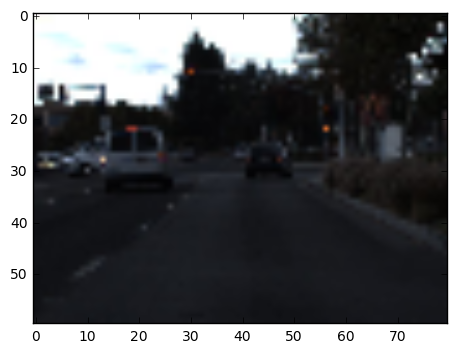

In [18]:
plt.imshow(img[0])

In [25]:
from tensorflow.examples.tutorials.mnist import mnist

In [26]:
mnist.IMAGE_SIZE

28

In [27]:
mnist.IMAGE_PIXELS

784

In [19]:
image

<tf.Tensor 'sub_3:0' shape=(921600,) dtype=float32>

In [14]:
image = tf.reshape(image, tf.pack([18, 18, 1]))

ValueError: Cannot reshape a tensor with 921600 elements to shape (18, 18, 1) (324 elements)

In [4]:
reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
    serialized_example,
    # Defaults are not specified since both keys are required.
    features={
        'image_raw': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    })

In [11]:
# Convert from a scalar string tensor (whose single string has
# length mnist.IMAGE_PIXELS) to a uint8 tensor with shape
# [mnist.IMAGE_PIXELS].
image = tf.decode_raw(features['image_raw'], tf.uint8)

In [ ]:
with tf.Session() as sess:
    image.eval()

In [ ]:


image.set_shape([mnist.IMAGE_PIXELS])
image = tf.cast(image, tf.float32) * (1. / 255) - 0.5
image = tf.reshape(image, [mnist.IMAGE_SIZE, mnist.IMAGE_SIZE, 1])

# OPTIONAL: Could reshape into a 28x28 image and apply distortions
# here.  Since we are not applying any distortions in this
# example, and the next step expects the image to be flattened
# into a vector, we don't bother.

# Convert label from a scalar uint8 tensor to an int32 scalar.
label = tf.cast(features['label'], tf.int32)